In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
#from SocialNetwork.cascade import *
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.UCB_no_anything import *
from Advertising.learners.UCB_no_qualities import *
from Advertising.learners.GTS_Learner import*
from Advertising.learners.GTS_SW_Learner import *
from Advertising.learners.TS_no_qualities import *
from Advertising.learners.TS_no_anything import *
from Advertising.learners.TS_sliding_window import *

seed = 6789 
random.seed(seed)
deltas=[0.5,0.42,0.38,0.30,0.2,0.05]
social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')
adversary_bids = []
for _ in range(0, 10): 
    adversary_i_bids = []
    for _ in range(0, 5):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)
array_estimation = compute_array_estimated_influence(social_network, 2000)


Doing node number 0
Doing node number 1
Doing node number 2
Doing node number 3
Doing node number 4
Doing node number 5
Doing node number 6
Doing node number 7
Doing node number 8
Doing node number 9
Doing node number 10
Doing node number 11
Doing node number 12
Doing node number 13
Doing node number 14
Doing node number 15
Doing node number 16
Doing node number 17
Doing node number 18
Doing node number 19
Doing node number 20
Doing node number 21
Doing node number 22
Doing node number 23
Doing node number 24
Doing node number 25
Doing node number 26
Doing node number 27
Doing node number 28
Doing node number 29
Doing node number 30
Doing node number 31
Doing node number 32
Doing node number 33
Doing node number 34
Doing node number 35
Doing node number 36
Doing node number 37
Doing node number 38
Doing node number 39
Doing node number 40
Doing node number 41
Doing node number 42
Doing node number 43
Doing node number 44
Doing node number 45
Doing node number 46
Doing node number 47
Do

In [2]:
arms = arms_creation(number_of_arms=20, seed=30291)
expected_values = []
vcg = VCG()
for i in range(0, len(arms)):
    expected_i=0
    bids = []
    bids.append(arms[i])
    for element in adversary_bids:
        bids.append(element)
    bids = setup(bids, 5)
    ad_allocation_list=vcg.all_best_allocations(bids, social_network)
    if i == 14:
        print(ad_allocation_list)
    payments = vcg.payments(bids, ad_allocation_list, social_network)


    for _ in range(3000):
        gain, active_by_click = activate_cascade(social_network, ad_allocation_list, 1, deltas)
        payments_tot = calculate_total_payment(payments, social_network.categories, active_by_click)
        reward = gain-payments_tot
        expected_i+=reward
        reset_nodes(social_network)
    
    expected_i = expected_i/3000
    expected_values.append(expected_i)


[[(bid=4, id=6), (bid=3, id=3), (bid=3, id=5), (bid=3, id=9), (bid=3, id=10), (bid=2, id=1)], [(bid=4, id=2), (bid=4, id=6), (bid=4, id=11), (bid=3, id=1), (bid=3, id=3), (bid=2, id=7)], [(bid=3, id=3), (bid=2, id=1), (bid=2, id=4), (bid=2, id=8), (bid=1, id=2), (bid=1, id=7)], [(bid=4, id=5), (bid=4, id=9), (bid=3, id=4), (bid=3, id=10), (bid=2, id=6), (bid=2, id=7)], [(bid=4, id=4), (bid=4, id=5), (bid=3, id=2), (bid=2, id=6), (bid=2, id=7), (bid=1, id=1)]]


In [3]:
print("Here are the maximum expected value and the arm that provides it, computed with the above \"Greedy\" approach")
print(max(expected_values))
print(arms[np.argmax(expected_values)])

Here are the maximum expected value and the arm that provides it, computed with the above "Greedy" approach
1.9683555555555536
[2 3 2 1 1]


In [4]:
rounds=10000
repetitions=4

In [5]:
print("Here are some outputs for the case without ad qualities, with only ads in first position")
for i in range(0, repetitions):
    
    ts_learner = GTS_Learner(20, arms, variance=20, ad_id=1)
    best_arm_no_qualities, index_no_qualities, number_of_pulls_no_qualities, expected_values_no_qualities, plotting_no_qualities = ts_no_qualities(ts_learner, arms, adversary_bids, True, array_estimation, rounds, deltas, social_network)
    print(best_arm_no_qualities)
    print(expected_values_no_qualities[index_no_qualities])


Here are some outputs for the case without ad qualities, with only ads in first position
[3 3 4 2 3]
3.7392971457149318
[3 3 4 2 3]
3.7573950595240286
[2 2 3 3 4]
3.282798935479058
[3 3 4 2 3]
3.740227507416395


In [6]:
print("Here are some outputs for the case without ad qualities, with all ads")
for i in range(0, repetitions):
    
    ts_learner2 = GTS_Learner(20, arms, variance=20, ad_id=1)
    best_arm_no_qualities2, index_no_qualities2, number_of_pulls_no_qualities2, expected_values_no_qualities2, plotting_no_qualities2 = ts_no_qualities(ts_learner2, arms, adversary_bids, False, array_estimation, rounds, deltas, social_network)
    print(best_arm_no_qualities2)
    print(expected_values_no_qualities2[index_no_qualities2])


Here are some outputs for the case without ad qualities, with all ads
[2 3 2 1 1]
3.76651108724722
[2 3 2 1 1]
3.795692688083657
[2 3 2 1 1]
3.791654628729414
[2 3 2 1 1]
3.7575854405635347


In [8]:
print("Here are some outputs for the case without anything, with only ads in first position")
for i in range(0, repetitions):
    
    ts_learner3 = GTS_Learner(20, arms, variance=30, ad_id=1)
    best_arm, index, number_of_pulls, expected_values, plotting = ts(ts_learner3, arms, adversary_bids, True, array_estimation, rounds, deltas, social_network)
    print(best_arm)
    print(expected_values[index])

Here are some outputs for the case without anything, with only ads in first position
[2 1 3 0 4]
1.4482740256596496
[2 3 4 2 4]
1.479080149501679
[2 3 4 2 4]
1.5468168572069279
[3 3 4 2 3]
1.7766752954418095


In [9]:
print("Here are some outputs for the case without anything, with all ads")
for i in range(0, repetitions):
    
    ts_learner4 = GTS_Learner(20, arms, variance=20, ad_id=1)
    best_arm2, index2, number_of_pulls2, expected_values2, plotting2 = ts(ts_learner4, arms, adversary_bids, False, array_estimation, rounds, deltas, social_network)
    print(best_arm2)
    print(expected_values2[index2])

Here are some outputs for the case without anything, with all ads
[2 3 2 1 1]
2.173236793339359
[2 3 2 1 1]
2.0688997247115566
[2 3 2 1 1]
2.103876298617808
[2 3 2 1 1]
2.203880161767846


Here are reward and regret for the case without ad qualities, with only ads in first position
1


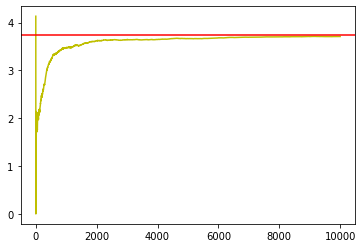

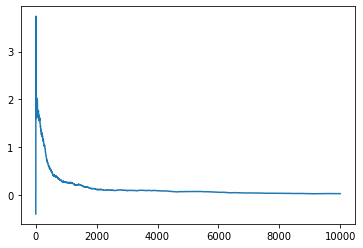

In [10]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
clairvoyant_no_qualities = expected_values_no_qualities[index_no_qualities]
regret_no_qualities = [expected_values_no_qualities[index_no_qualities] - x for x in plotting_no_qualities]
plt.figure(0)
plt.plot(plotting_no_qualities, 'y')
plt.axhline(y=expected_values_no_qualities[index_no_qualities], color='r', linestyle='-')
print(index_no_qualities)
plt.figure(1)
plt.plot(regret_no_qualities)

Here are reward and regret for the case without ad qualities, with all ads
14


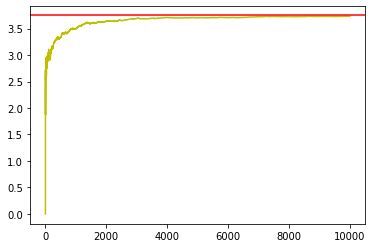

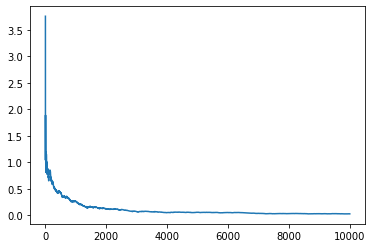

In [11]:
print("Here are reward and regret for the case without ad qualities, with all ads")
clairvoyant_no_qualities2 = expected_values_no_qualities2[index_no_qualities2]
regret_no_qualities2 = [expected_values_no_qualities2[index_no_qualities2] - x for x in plotting_no_qualities2]
plt.figure(0)
plt.plot(plotting_no_qualities2, 'y')
plt.axhline(y=expected_values_no_qualities2[index_no_qualities2], color='r', linestyle='-')
print(index_no_qualities2)
plt.figure(1)
plt.plot(regret_no_qualities2)

Here are reward and regret for the case without anything, with only ads in first position
1


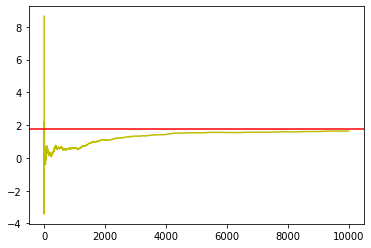

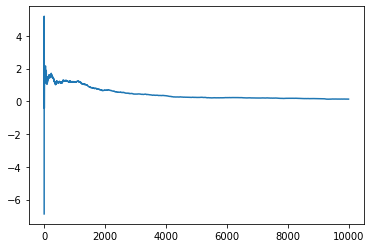

In [12]:
print("Here are reward and regret for the case without anything, with only ads in first position")
clairvoyant = expected_values[index]
regret = [expected_values[index] - x for x in plotting]
plt.figure(4)
plt.plot(plotting, 'y')
plt.axhline(y=expected_values[index], color='r', linestyle='-')
print(index)
plt.figure(5)
plt.plot(regret) 

Here are reward and regret for the case without anything, with all ads
14


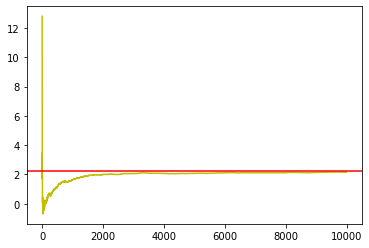

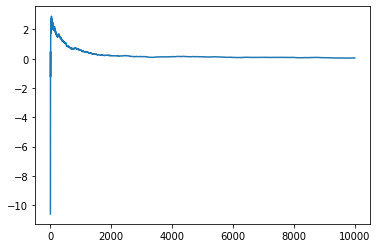

In [13]:
print("Here are reward and regret for the case without anything, with all ads")
clairvoyant2 = expected_values2[index2]
regret2 = [expected_values2[index2] - x for x in plotting2]
plt.figure(6)
plt.plot(plotting2, 'y')
plt.axhline(y=expected_values2[index2], color='r', linestyle='-')
print(index2)
plt.figure(7)
plt.plot(regret2) 

In [14]:
expected_values = []
expected_values2 = []
sw_size = 5000
only_first = False
arms = arms_creation(seed=30291, number_of_arms=20)
ts_learner = GTS_SW_Learner(20, arms, variance=20, size_SW=sw_size, ad_id=1)
ts_learner2 = GTS_SW_Learner(20, arms, variance=10, size_SW=sw_size, ad_id=1)
n_experiments = 15000

for j in range(0, 1):
    best_Arm = []
    print("This is TS number " + str(j))

    best_arm, best_arm_index, number_of_pulls, expected_values, thing_to_plot, clairvoyants, clair_ex = test_sw(
        ts_learner, arms, adversary_bids.copy(), only_first, n_experiments, deltas, social_network, sw_size)
    best_arm2, best_arm_index2, number_of_pulls2, expected_values2, thing_to_plot2, clairvoyants2, clair_ex2 = test_sw(
        ts_learner2, arms, adversary_bids.copy(), not only_first, n_experiments, deltas, social_network, sw_size)

print(np.array(arms)[clairvoyants])
print(clair_ex)
print(np.array(arms)[clairvoyants2])
print(clair_ex2)


This is TS number 0
[[2 3 2 1 1]
 [2 3 2 1 1]
 [2 3 2 1 1]]
[2.1529785809906286, 1.5111939206655354, 2.1629819277108475]
[[3 3 4 2 3]
 [4 2 3 4 0]
 [3 1 2 2 3]]
[1.7302636916835568, 7.620000000000001, 2.6964551641312933]


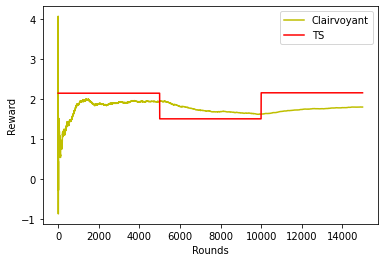

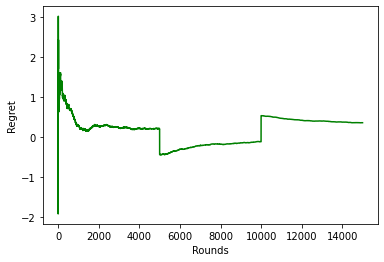

In [15]:
best_values = []
j = 0
k = 0
for i in range(n_experiments):
    k += 1
    best_values.append(clair_ex[j])
    if k == sw_size:
        k = 0
        j += 1

regret_no_qualities = [
    best_values[x] - thing_to_plot[x] for x in range(len(thing_to_plot))]
plt.figure(0)
plt.plot(thing_to_plot, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(best_values, 'r')
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities, 'g')


Here are reward and regret for the case without ad qualities, with only ads in first position


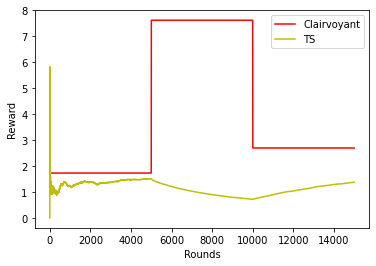

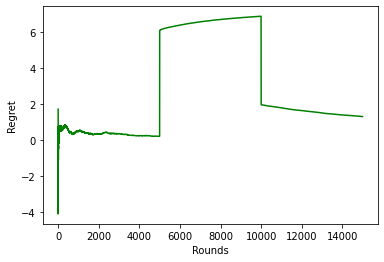

In [16]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
best_values2 = []
j = 0
k = 0
for i in range(n_experiments):
    k += 1
    best_values2.append(clair_ex2[j])
    if k == sw_size:
        k = 0
        j += 1

regret_no_qualities2 = [
    best_values2[x] - thing_to_plot2[x] for x in range(len(thing_to_plot2))]
plt.figure(0)
plt.plot(best_values2, 'r')
plt.plot(thing_to_plot2, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities2, 'g')
